In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random

In [12]:
# Sample random images
def displayRandom(images, n, rows=None, cols=None, figsize=(16, 16), titles=None, monochrome=False):
    
    if rows == None and cols == None:
        sqr = n**0.5
        rows = np.ceil(sqr)
        cols = np.round(sqr)
        
    elif cols == None:
        cols = np.ceil(n * 1. /rows)
    
    else:
        rows = np.ceil(n * 1. /cols)
    
    nOfImgs = len(images)
    randomImgIds = random.sample(range(nOfImgs), n)
    
    fig=plt.figure(figsize=figsize)
    for i in range(1, n+1):
        ax = fig.add_subplot(rows, cols, i)
        if titles != None:
            ax.title.set_text(str(titles[randomImgIds[i-1]]))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
        if not monochrome:
            plt.imshow(images[randomImgIds[i-1]])
        else:
            img = np.squeeze(images[randomImgIds[i-1]])
            plt.imshow(img, cmap='copper')

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
#     plt.show()
    
    return fig

In [13]:
file = "./data/fish/fish-cache-train.pkl"

with open(file,'rb') as f:
    x = pickle.load(f)
    
print("Content of x: ", x.keys(), "\n")
print("Number of classes:", len(x["class_dict"].keys()), "\n")
print("Classes:", x["class_dict"].keys(), "\n")
print("Size of image dataset:", np.shape(x["image_data"]), "\n")

Content of x:  dict_keys(['image_data', 'class_dict']) 

Number of classes: 9 

Classes: dict_keys(['fish_09', 'fish_11', 'fish_04', 'fish_01', 'fish_16', 'fish_22', 'fish_03', 'fish_15', 'fish_02']) 

Size of image dataset: (23065, 84, 84, 3) 



/tmp/ipykernel_32976/2565150045.py:20: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(rows, cols, i)


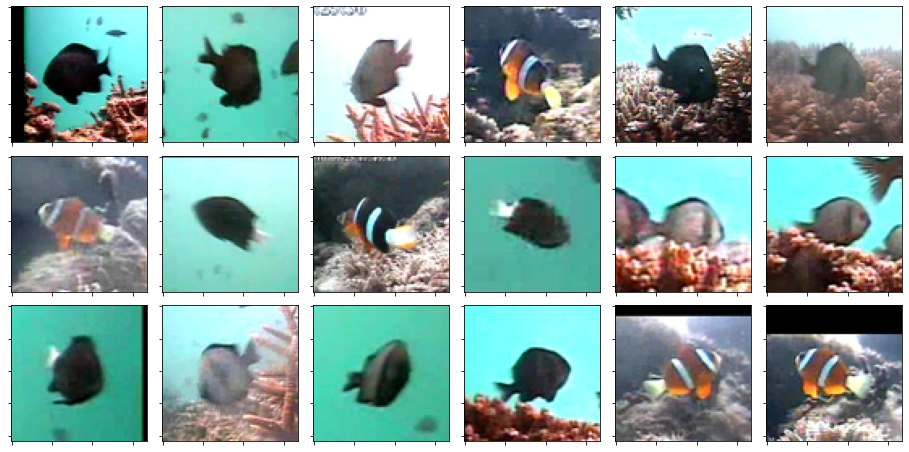

In [14]:
fig = displayRandom(x["image_data"], 18, rows=3, figsize=(16, 8))